In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.DataFrame({'ID':[1,2,3,4,5,6], 
                   'First Name':['Felix', 'Jean', 'James', 'Daphne', 'James', 'Peter'], 
                   'Family Name': ['Revert', 'Durand', 'Wright', 'Hull', 'Conrad', 'Donovan'],
                   'Phone number': ['+33 6 12 34 56 78', '+33 7 00 00 00 00', '+33 6 12 34 56 78', '+33 6 99 99 99 99', '+852 0123 4567', '+852 0123 4567'],
                   'Email': ['felix.revert@gmail.com', 'jean.durand@gmail.com', 'j.custom@gmail.com', pd.np.nan, 'j.custom@gmail.com', pd.np.nan]})


In [5]:
def prepare_eadge_dataset(input_dataset, column_ID, column_edge):
    data_to_merge = input_dataset[[column_ID, column_edge]].dropna(subset=[column_edge]).drop_duplicates() # select columns, remove NaN

    # To create connections between people who have the same number,
    # join data with itself on the 'ID' column.
    data_to_merge = data_to_merge.merge(
        data_to_merge[[column_ID, column_edge]].rename(columns={column_ID:column_ID+"_2"}), 
        on=column_edge
    )
    
    # By joining the data with itself, people will have a connection with themselves.
    # Remove self connections, to keep only connected people who are different.
    d = data_to_merge[~(data_to_merge[column_ID]==data_to_merge[column_ID+"_2"])].dropna()[[column_ID, column_ID+"_2", column_edge]]

    # To avoid counting twice the connections (person 1 connected to person 2 and person 2 connected to person 1)
    # we force the first ID to be "lower" then ID_2
    d.drop(d.loc[d[column_ID+"_2"]<d[column_ID]].index.tolist(), inplace=True)
    
    #d = d.drop(column_edge, axis=1)
    return d

In [10]:
column_edge_list = ['Phone number']
column_ID = 'ID'

all_node_edge_df = pd.DataFrame(columns=[column_ID, column_ID+'_2'])

column_edge_list = column_edge_list
for column_edge in column_edge_list:
    node_edge_df = prepare_eadge_dataset(df, column_ID, column_edge)
    print(node_edge_df.shape)
    all_node_edge_df = all_node_edge_df.append(node_edge_df, ignore_index=True)
all_node_edge_df.shape

(2, 3)


(2, 3)

In [11]:
all_node_edge_df = all_node_edge_df.drop_duplicates()
print(all_node_edge_df.shape)
all_node_edge_df.head()

(2, 3)


,ID,ID_2,Phone number
0,1,3,+33 6 12 34 56 78
1,5,6,+852 0123 4567


In [12]:
G = nx.from_pandas_edgelist(df=d, source=column_ID, target=column_ID+'_2', edge_attr=column_edge)

G.add_nodes_from(nodes_for_adding=df.ID.tolist())

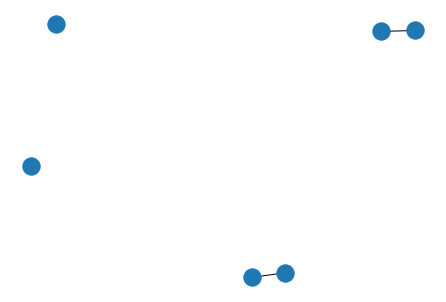

In [13]:
nx.draw(G)